<div align="center"> 
    <hr>
  <font size="6"><b>Dev | Clean-Clean Entity Resolution Notebook</b> </font>
   <hr>
</div>

In [5]:
!python --version

Python 3.10.12


In [2]:
import os
import sys
import pandas as pd
import networkx
from networkx import draw, Graph
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from pyjedai.utils import (
    text_cleaning_method,
    print_clusters,
    print_blocks,
    print_candidate_pairs
)
from pyjedai.evaluation import Evaluation
from pyjedai.datamodel import Data
d1 = pd.read_csv("../data/ccer/D2/abt.csv", sep='|', engine='python')
d2 = pd.read_csv("../data/ccer/D2/buy.csv", sep='|', engine='python')
gt = pd.read_csv("../data/ccer/D2/gt.csv", sep='|', engine='python')


if 'aggregate value' in d1.columns.tolist():
    d1.drop(columns=['aggregate value'], inplace=True)

if 'aggregate value' in d2.columns.tolist():
    d2.drop(columns=['aggregate value'], inplace=True)

data = Data(
    dataset_1=d1,
    # attributes_1=['id','name','description'],
    id_column_name_1='id',
    dataset_2=d2,
    # attributes_2=['id','name','description'],
    id_column_name_2='id',
    ground_truth=gt,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data.dataset_2.iloc[216]

id                                      216
name           LG Navy Blue SteamWasher 27'
description                                
price                                      
Name: 216, dtype: object

In [4]:
data.print_specs()

------------------------- Data -------------------------
Type of Entity Resolution:  Clean-Clean
Dataset-1:
	Number of entities:  1076
	Number of NaN values:  0
	Attributes: 
		 ['name', 'description', 'price']
Dataset-2:
	Number of entities:  1076
	Number of NaN values:  0
	Attributes: 
		 ['name', 'description', 'price']

Total number of entities:  2152
Number of matching pairs in ground-truth:  1076
-------------------------------------------------------- 



In [5]:
data.dataset_1

,id,name,description,price
0,0,Sony Turntable - PSLX350H,Sony Turntable - PSLX350H/ Belt Drive System/ ...,
1,1,Bose Acoustimass 5 Series III Speaker System -...,Bose Acoustimass 5 Series III Speaker System -...,399.0
2,2,Sony Switcher - SBV40S,Sony Switcher - SBV40S/ Eliminates Disconnecti...,49.0
3,3,Sony 5 Disc CD Player - CDPCE375,Sony 5 Disc CD Player- CDPCE375/ 5 Disc Change...,
4,4,Bose 27028 161 Bookshelf Pair Speakers In Whit...,Bose 161 Bookshelf Speakers In White - 161WH/ ...,158.0
...,...,...,...,...
1071,1071,Logitech Cordless Desktop Wave Keyboard And Mo...,Logitech Cordless Desktop Wave Keyboard And Mo...,79.0
1072,1072,Mitsubishi DLP Black TV Stand - MBS73V,Mitsubishi DLP Black TV Stand - MBS73V/ Matchi...,549.0
1073,1073,Logitech Digital Precision PC Gaming Headset -...,Logitech Digital Precision PC Gaming Headset -...,49.0
1074,1074,Logitech 2.1 Multimedia Silver Speaker System ...,Logitech 2.1 Multimedia Silver Speaker System ...,


# Block Building

In [6]:
from pyjedai.block_building import (
    StandardBlocking,
    QGramsBlocking,
    ExtendedQGramsBlocking,
    SuffixArraysBlocking,
    ExtendedSuffixArraysBlocking,
)

c:\Users\nikol\anaconda3\envs\r007\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
qgb = StandardBlocking()
blocks = qgb.build_blocks(data)

Standard Blocking: 100%|██████████| 2152/2152 [00:00<00:00, 2196.30it/s]


In [8]:
qgb.evaluate(blocks, with_classification_report=True)

***************************************************************************************************************************
                                         Μethod:  Standard Blocking
***************************************************************************************************************************
Method name: Standard Blocking
Parameters: 
Runtime: 0.9859 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      0.11% 
	Recall:        99.81%
	F1-score:       0.23%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1074
	False positives: 948081
	True negatives: 1156698
	False negatives: 2
	Total comparisons: 949155
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 0.11315327844240403,
 'Recall %': 99.81412639405205,
 'F1 %': 0.22605029724351236,
 'True Positives': 1074,
 'False Positives': 948081,
 'True Negatives': 1156698,
 'False Negatives': 2}

In [9]:
qgb.stats(blocks)

Statistics:
	Number of blocks: 2132
	Average block size: 19
	Median block size: 5
	Max block size: 818
	Min block size: 2
	Number of blocks dropped: 4516
	Number of comparisons: 949155
	Max comparisons per block: 94500
	Min comparisons per block: 1
	Entities in blocks: 2152
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


# Block Cleaning

In [10]:
from pyjedai.block_cleaning import BlockFiltering

In [11]:
bf = BlockFiltering(ratio=0.075)
filtered_blocks = bf.process(blocks, data, tqdm_disable=False)

Block Filtering: 100%|██████████| 3/3 [00:00<00:00, 11.91it/s]


In [12]:
bf.evaluate(filtered_blocks)

***************************************************************************************************************************
                                         Μethod:  Block Filtering
***************************************************************************************************************************
Method name: Block Filtering
Parameters: 
	Ratio: 0.075
Runtime: 0.2614 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     55.01% 
	Recall:        58.64%
	F1-score:      56.77%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 55.013077593722755,
 'Recall %': 58.64312267657993,
 'F1 %': 56.770130454340986,
 'True Positives': 631,
 'False Positives': 516,
 'True Negatives': 1156255,
 'False Negatives': 445}

In [ ]:
from pyjedai.utils import java_math_round

ratio = 0.075
for e, b in bf.entity_index.items():
    print(e,",",java_math_round(ratio*float(len(b))))

In [38]:
bf.export_to_df(filtered_blocks)

,id1,id2
0,2,33
1,865,33
2,40,33
3,871,33
4,3,192
...,...,...
1142,985,541
1143,985,563
1144,1012,541
1145,1012,563


In [14]:
bf.stats(filtered_blocks)

Statistics:
	Number of blocks: 783
	Average block size: 2
	Median block size: 2
	Max block size: 9
	Min block size: 2
	Number of blocks dropped: 1349
	Number of comparisons: 1147
	Max comparisons per block: 12
	Min comparisons per block: 1
	Entities in blocks: 1562
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


# Comparison Cleaning


In [15]:
from pyjedai.block_cleaning import BlockPurging

In [16]:
cbbp = BlockPurging()
cleaned_blocks = cbbp.process(filtered_blocks, data, tqdm_disable=False)

Block Purging: 100%|██████████| 1566/1566 [00:00<00:00, 64700.01it/s]


In [17]:
cbbp.evaluate(cleaned_blocks, with_classification_report=True)

***************************************************************************************************************************
                                         Μethod:  Block Purging
***************************************************************************************************************************
Method name: Block Purging
Parameters: 
	Smoothing factor: 1.025
	Max Comparisons per Block: 12.0
Runtime: 0.0467 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     55.01% 
	Recall:        58.64%
	F1-score:      56.77%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 631
	False positives: 516
	True negatives: 1156255
	False negatives: 445
	Total comparisons: 1147
─────────────────────────────────────────────────────────────────────────────────────────────────

{'Precision %': 55.013077593722755,
 'Recall %': 58.64312267657993,
 'F1 %': 56.770130454340986,
 'True Positives': 631,
 'False Positives': 516,
 'True Negatives': 1156255,
 'False Negatives': 445}

In [37]:
cbbp.export_to_df(cleaned_blocks)

,id1,id2
0,2,33
1,865,33
2,40,33
3,871,33
4,3,192
...,...,...
1142,985,541
1143,985,563
1144,1012,541
1145,1012,563


## Meta Blocking

In [19]:
from pyjedai.comparison_cleaning import (
    WeightedEdgePruning,
    WeightedNodePruning,
    CardinalityEdgePruning,
    CardinalityNodePruning,
    BLAST,
    ReciprocalCardinalityNodePruning,
    ReciprocalWeightedNodePruning,
    ComparisonPropagation
)

In [20]:
wep = CardinalityEdgePruning(weighting_scheme='X2')
candidate_pairs_blocks = wep.process(filtered_blocks, data)

Cardinality Edge Pruning:   0%|          | 0/1076 [00:00<?, ?it/s]Cardinality Edge Pruning: 100%|██████████| 1076/1076 [00:00<00:00, 1735.51it/s]


In [21]:
wep.evaluate(candidate_pairs_blocks, with_classification_report=True)

***************************************************************************************************************************
                                         Μethod:  Cardinality Edge Pruning
***************************************************************************************************************************
Method name: Cardinality Edge Pruning
Parameters: 
	Node centric: False
	Weighting scheme: X2
Runtime: 0.6303 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     64.01% 
	Recall:        56.04%
	F1-score:      59.76%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 603
	False positives: 339
	True negatives: 1156227
	False negatives: 473
	Total comparisons: 942
───────────────────────────────────────────────────────────────────────────────────────────

{'Precision %': 64.01273885350318,
 'Recall %': 56.040892193308544,
 'F1 %': 59.762140733399406,
 'True Positives': 603,
 'False Positives': 339,
 'True Negatives': 1156227,
 'False Negatives': 473}

# Entity Matching

It compares pairs of entity profiles, associating every pair with a similarity in [0,1]. Its output comprises the similarity graph, i.e., an undirected, weighted graph where the nodes correspond to entities and the edges connect pairs of compared entities.

In [23]:
from pyjedai.matching import EntityMatching

In [24]:
EM = EntityMatching(
    metric='jaccard',
    tokenizer='word_tokenizer',
    qgram=5,
    similarity_threshold=0.0
)

pairs_graph = EM.predict(candidate_pairs_blocks, data, tqdm_disable=True)

In [25]:
EM.evaluate(pairs_graph)

***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_5gram
Runtime: 3.9785 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     92.19% 
	Recall:        10.97%
	F1-score:      19.60%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 92.1875,
 'Recall %': 10.966542750929369,
 'F1 %': 19.601328903654487,
 'True Positives': 118,
 'False Positives': 10,
 'True Negatives': 1155742,
 'False Negatives': 958}

In [26]:
data.entities

,id,name,description,price
0,0,Sony Turntable - PSLX350H,Sony Turntable - PSLX350H/ Belt Drive System/ ...,
1,1,Bose Acoustimass 5 Series III Speaker System -...,Bose Acoustimass 5 Series III Speaker System -...,399.0
2,2,Sony Switcher - SBV40S,Sony Switcher - SBV40S/ Eliminates Disconnecti...,49.0
3,3,Sony 5 Disc CD Player - CDPCE375,Sony 5 Disc CD Player- CDPCE375/ 5 Disc Change...,
4,4,Bose 27028 161 Bookshelf Pair Speakers In Whit...,Bose 161 Bookshelf Speakers In White - 161WH/ ...,158.0
...,...,...,...,...
2147,1071,Sony VAIO FW378J/B Notebook - VGNFW378J/B,Intel Centrino 2 Core 2 Duo P8600 2.4GHz - 16....,
2148,1072,Sennheiser CX380 Sennheiser CX 380 Sport II Gr...,,
2149,1073,IWORK 09 RETAIL-INT DVD - MB942Z/A,,
2150,1074,IWORK 09 FAMILY PACK-INT DVD - MB943Z/A,,


In [ ]:
string_metrics = [
    'jaro', 'edit_distance'
]

set_metrics = [
    'cosine', 'dice', 'generalized_jaccard', 'jaccard', 'overlap_coefficient'
]

char_tokenizers = ['char_tokenizer']
word_tokenizers = ['word_tokenizer']
magellan_tokenizers = ['white_space_tokenizer']
tok = char_tokenizers + word_tokenizers + magellan_tokenizers

for m in string_metrics+set_metrics:
    for t in tok:
        for qgram in range(1,6)
            print("\nM =",m,"\nT =",t)
            EM = EntityMatching(metric = m, 
                                tokenizer = t, 
                                qgram = qgram,
                                similarity_threshold = 0.0)

            pairs_graph = EM.predict(candidate_pairs_blocks, data)
            EM.evaluate(pairs_graph)

In [ ]:
EM.corpus[206]

'lg tromm wm2688hnm 4.2 cu. ft. navy blue front load allergiene steamwasher - wm2688hnbl'

In [ ]:
EM.corpus[data.dataset_limit+216]

"lg navy blue steamwasher 27'"

In [ ]:
data.dataset_2.iloc[216]

id                                      216
name           LG Navy Blue SteamWasher 27'
description                                
price                                      
Name: 216, dtype: object

In [ ]:
# EM.tfidf_matrix

from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between all pairs of strings in the list
similarity_matrix = cosine_similarity(EM.tfidf_matrix)


In [ ]:
EM._entities_d1

In [ ]:
EM.tfidf_similarity_matrix

array([[1.        , 0.00158171, 0.04005327, ..., 0.00171622, 0.00158923,
        0.00147107],
       [0.00158171, 1.        , 0.00619731, ..., 0.00119504, 0.00110661,
        0.02257776],
       [0.04005327, 0.00619731, 1.        , ..., 0.0019111 , 0.00176968,
        0.00576379],
       ...,
       [0.00171622, 0.00119504, 0.0019111 , ..., 1.        , 0.50341936,
        0.00111144],
       [0.00158923, 0.00110661, 0.00176968, ..., 0.50341936, 1.        ,
        0.00519086],
       [0.00147107, 0.02257776, 0.00576379, ..., 0.00111144, 0.00519086,
        1.        ]])

In [ ]:
similarity_matrix[206][data.dataset_limit+216]
# similarity_matrix[206][data.dataset_limit+216]

0.12950955755331722

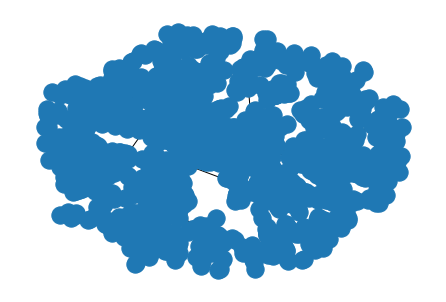

In [ ]:
draw(pairs_graph)

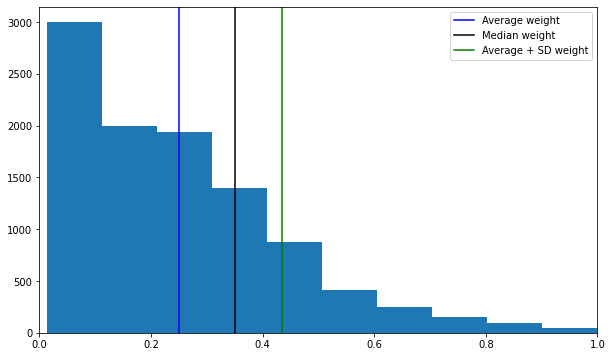

In [ ]:
EM.plot_distribution_of_all_weights()

Distribution-% of predicted scores:  [27.37298148877511, 19.968491532099254, 19.082315872390705, 14.592359196534069, 9.216226860968886, 4.263489562820008, 2.5600630169358016, 1.5557306025994486, 0.9551004332414336, 0.3052382827884994]


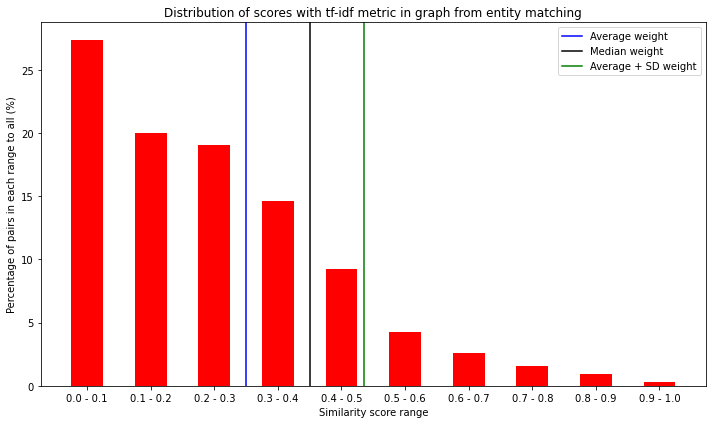

In [ ]:
EM.plot_distribution_of_scores()

In [ ]:
EM.evaluate(pairs_graph)

***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Tokenizer: word_qgram_tokenizer
	Metric: tf-idf
	Similarity Threshold: 0.0
Runtime: 0.2222 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      9.64% 
	Recall:        90.99%
	F1-score:      17.43%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 9.63962189838519,
 'Recall %': 90.98513011152416,
 'F1 %': 17.432336182336183,
 'True Positives': 979,
 'False Positives': 9177,
 'True Negatives': 1148502,
 'False Negatives': 97}

In [ ]:
# Fill NaN values with empty string
data.dataset_1 = data.dataset_1.fillna("", inplace=True)
if not data.is_dirty_er:
    data.dataset_2 = data.dataset_2.fillna("", inplace=True)

AttributeError: 'NoneType' object has no attribute 'fillna'

In [ ]:
EM.evaluate(pairs_graph)

***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Tokenizer: word_qgram_tokenizer
	Metric: tf-idf
	Similarity Threshold: 0.0
Runtime: 0.2222 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      9.64% 
	Recall:        90.99%
	F1-score:      17.43%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 9.63962189838519,
 'Recall %': 90.98513011152416,
 'F1 %': 17.432336182336183,
 'True Positives': 979,
 'False Positives': 9177,
 'True Negatives': 1148502,
 'False Negatives': 97}

# Entity Clustering

It takes as input the similarity graph produced by Entity Matching and partitions it into a set of equivalence clusters, with every cluster corresponding to a distinct real-world object.

In [28]:
from pyjedai.clustering import ConnectedComponentsClustering, UniqueMappingClustering

In [29]:
ccc = ConnectedComponentsClustering()
clusters = ccc.process(pairs_graph, data)

In [30]:
ccc.evaluate(clusters, with_classification_report=True)

***************************************************************************************************************************
                                         Μethod:  Connected Components Clustering
***************************************************************************************************************************
Method name: Connected Components Clustering
Parameters: 
Runtime: 0.0636 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     95.31% 
	Recall:        41.54%
	F1-score:      57.86%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 447
	False positives: 22
	True negatives: 1156071
	False negatives: 629
	Total comparisons: 469
─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

{'Precision %': 95.3091684434968,
 'Recall %': 41.542750929368026,
 'F1 %': 57.86407766990291,
 'True Positives': 447,
 'False Positives': 22,
 'True Negatives': 1156071,
 'False Negatives': 629}

In [31]:
from pyjedai.clustering import ConnectedComponentsClustering, UniqueMappingClustering
umc = UniqueMappingClustering()
clusters = umc.process(pairs_graph, data)

In [32]:
umc.evaluate(clusters, with_classification_report=True)

***************************************************************************************************************************
                                         Μethod:  Unique Mapping Clustering
***************************************************************************************************************************
Method name: Unique Mapping Clustering
Parameters: 
Runtime: 0.0732 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     84.66% 
	Recall:        52.32%
	F1-score:      64.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 563
	False positives: 102
	True negatives: 1156187
	False negatives: 513
	Total comparisons: 665
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 84.66165413533835,
 'Recall %': 52.32342007434945,
 'F1 %': 64.67547386559448,
 'True Positives': 563,
 'False Positives': 102,
 'True Negatives': 1156187,
 'False Negatives': 513}

In [36]:
umc.export_to_df(clusters)

,id1,id2
0,25,21
1,746,636
2,982,977
3,47,79
4,879,896
...,...,...
660,393,422
661,867,779
662,868,780
663,422,850
